In [1]:
from fastai.vision.all import *

In [2]:
path = untar_data(URLs.CAMVID_TINY)

dls = SegmentationDataLoaders.from_label_func(
        path, bs=8, fnames = get_image_files(path/"images"),
        label_func = lambda o: path/'labels'/f'{o.stem}_P{o.suffix}',
        codes=np.loadtxt(path/'codes.txt', dtype=str)
)

learn = unet_learner(dls, resnet34)
learn.fine_tune(8)

/home/maquina1/anaconda3/envs/fastaiTorch/lib/python3.7/site-packages/torch/_tensor.py:1051: UserWarning: __floordiv__ is deprecated, and its behavior will change in a future version of pytorch. It currently rounds toward 0 (like the 'trunc' function NOT 'floor'). This results in incorrect rounding for negative values. To keep the current behavior, use torch.div(a, b, rounding_mode='trunc'), or for actual floor division, use torch.div(a, b, rounding_mode='floor').
  ret = func(*args, **kwargs)


epoch,train_loss,valid_loss,time
0,3.293171,2.340194,00:02


epoch,train_loss,valid_loss,time
0,2.019288,1.678379,00:01
1,1.743591,1.448973,00:01
2,1.544395,1.172224,00:01
3,1.391719,0.987041,00:01
4,1.250904,0.839747,00:01
5,1.130519,0.769528,00:01
6,1.029636,0.756207,00:01
7,0.952922,0.736109,00:01


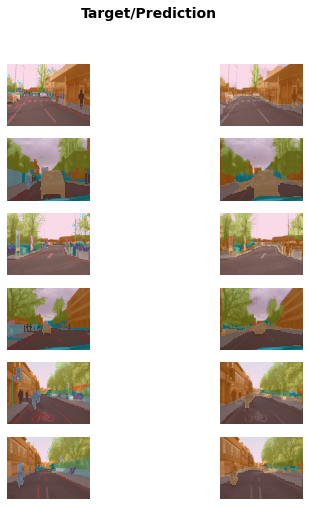

In [3]:
learn.show_results(max_n=6, figsize=(7, 8))